In [15]:
import pandas as pd
import numpy as np
import random

n_samples = 2000

def assign_response(severity, crp, bmi, drug):
    if severity >= 4 or crp > 6:
        return "None"
    elif severity in [2, 3] and crp < 5 and drug in ["NSAID", "Glucosamine"]:
        return "Good"
    else:
        return "Partial"

data = []
for _ in range(n_samples):
    age = np.random.randint(40, 85)
    gender = random.choice(["Male", "Female"])
    bmi = round(np.random.uniform(18, 40), 1)
    severity = np.random.randint(1, 5)
    duration = np.random.randint(1, 20)
    crp = round(np.random.uniform(0, 10), 1)
    esr = np.random.randint(0, 100)
    drug = random.choice(["NSAID", "Corticosteroid", "Glucosamine", "Physiotherapy"])
    dosage = random.choice(["Low", "Medium", "High"])
    treat_months = np.random.randint(1, 7)
    activity = random.choice(["Low", "Moderate", "High"])
    diet_score = np.random.randint(1, 11)
    smoke = random.choice(["Yes", "No"])
    alcohol = random.choice(["Yes", "No"])
    
    response = assign_response(severity, crp, bmi, drug)
    
    data.append([
        age, gender, bmi, severity, duration, crp, esr, drug,
        dosage, treat_months, activity, diet_score, smoke, alcohol, response
    ])

columns = [
    "Age", "Gender", "BMI", "OA_Severity", "Duration_of_OA", "CRP", "ESR",
    "Drug_Type", "Dosage_Level", "Treatment_Duration", "Activity_Level",
    "Diet_Score", "Smoking_Status", "Alcohol_Consumption", "Response"
]

df = pd.DataFrame(data, columns=columns)
df.to_csv("synthetic_oa_drug_response.csv", index=False)


In [1]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib  # for saving the model


In [16]:
# Step 2: Load data
df = pd.read_csv("synthetic_oa_drug_response.csv")
df.head()


,Age,Gender,BMI,OA_Severity,Duration_of_OA,CRP,ESR,Drug_Type,Dosage_Level,Treatment_Duration,Activity_Level,Diet_Score,Smoking_Status,Alcohol_Consumption,Response
0,79,Male,28.4,3,5,3.1,0,NSAID,Low,6,Low,6,Yes,No,Good
1,70,Female,23.1,2,10,1.6,18,Physiotherapy,Medium,1,Low,7,Yes,Yes,Partial
2,41,Male,30.7,1,1,8.1,85,Physiotherapy,Low,5,Low,8,Yes,Yes,NaN
3,80,Male,20.4,2,7,8.1,34,Glucosamine,Medium,1,High,3,No,Yes,NaN
4,78,Male,22.6,4,8,5.3,21,Glucosamine,Medium,5,Moderate,7,Yes,No,NaN


In [17]:
# Step 3: Encode categorical columns
le = LabelEncoder()
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [18]:
# Step 4: Define X (features) and y (target)
X = df.drop("Response", axis=1)
y = df["Response"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Step 5: Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.995

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       0.98      1.00      0.99       127
           2       1.00      1.00      1.00       215

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



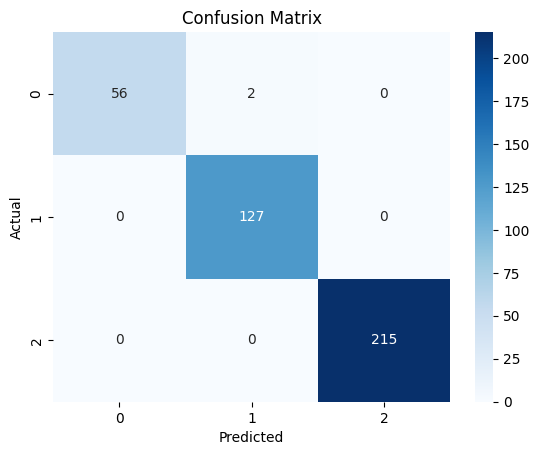

In [20]:
# Step 6: Evaluation
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:
# Step 7: Save model
joblib.dump(rf, "oa_drug_response_model.pkl")

# Save column names for Streamlit input matching
joblib.dump(X.columns.tolist(), "model_features.pkl")


['model_features.pkl']

In [22]:
from sklearn.preprocessing import LabelEncoder

# Assuming these are the possible values
gender_values = ["Male", "Female"]

# Initialize the LabelEncoder
le_gender = LabelEncoder()

# Fit it with the possible values
le_gender.fit(gender_values)

# Save the LabelEncoder to use later
joblib.dump(le_gender, 'gender_label_encoder.pkl')



['gender_label_encoder.pkl']

In [23]:
# Save the LabelEncoder
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

In [24]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Define the LabelEncoder
le_drug_type = LabelEncoder()

# Fit the encoder on the unique values for drug_type
le_drug_type.fit(["NSAID", "Corticosteroid", "Glucosamine", "Physiotherapy"])

# Save the encoder to a file
joblib.dump(le_drug_type, "drug_type_label_encoder.pkl")


['drug_type_label_encoder.pkl']

In [25]:
# Define the LabelEncoder
le_activity_level = LabelEncoder()

# Fit the encoder on the unique values for activity_level
le_activity_level.fit(["Low", "Moderate", "High"])

# Save the encoder to a file
joblib.dump(le_activity_level, "activity_level_label_encoder.pkl")


['activity_level_label_encoder.pkl']

In [26]:
# Define the LabelEncoder
le_smoking_status = LabelEncoder()

# Fit the encoder on the unique values for smoking_status
le_smoking_status.fit(["Yes", "No"])

# Save the encoder to a file
joblib.dump(le_smoking_status, "smoking_status_label_encoder.pkl")


['smoking_status_label_encoder.pkl']

In [27]:
# Define the LabelEncoder
le_alcohol_consumption = LabelEncoder()

# Fit the encoder on the unique values for alcohol_consumption
le_alcohol_consumption.fit(["Yes", "No"])

# Save the encoder to a file
joblib.dump(le_alcohol_consumption, "alcohol_consumption_label_encoder.pkl")


['alcohol_consumption_label_encoder.pkl']

In [28]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Sample values based on your app
dosage_levels = ['Low', 'Medium', 'High']

# Create the label encoder
le_dosage_level = LabelEncoder()

# Fit the encoder on the known categories
le_dosage_level.fit(dosage_levels)

# Save the encoder to a file
joblib.dump(le_dosage_level, 'dosage_level_label_encoder.pkl')


['dosage_level_label_encoder.pkl']

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)
joblib.dump(model, "oa_drug_response_model.pkl")


['oa_drug_response_model.pkl']

In [37]:
 
# If your Response column is numeric (0, 1, 2), convert it back to string labels
df['Response'] = df['Response'].replace({
    0: 'Good',
    1: 'Partial',
    2: 'None'
})



In [38]:
print(df['Response'].unique())  # ✅ Should print: ['Good', 'Partial', 'None']


['Good' 'Partial' 'None']


In [39]:
from sklearn.preprocessing import LabelEncoder
import joblib

le_response = LabelEncoder()
df['Response'] = le_response.fit_transform(df['Response'])

# Save the encoder
joblib.dump(le_response, "response_label_encoder.pkl")

# Confirm mapping
print("Class Labels:", le_response.classes_)  # ✅ Should print: ['Good' 'None' 'Partial']


Class Labels: ['Good' 'None' 'Partial']
